<a href="https://colab.research.google.com/github/Alhamdanaaa/PCVK_Ganjil_24-25/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 6**
## Nama  : Alhamdana Fariz Al Furqaan
## Kelas : TI-3F
## Absen : 03

Github Link: [Github Alhamdanaaa](https://github.com/Alhamdanaaa/PCVK_Ganjil_24-25)

In [83]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [84]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# 3. Buatlah histogram citra seperti output histogram

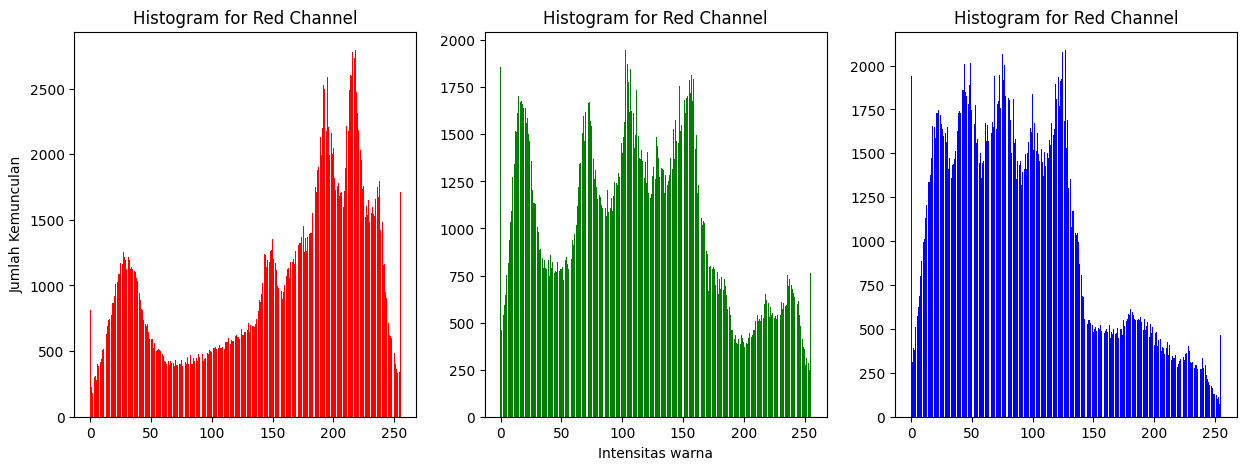

In [85]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

hist_b = cv.calcHist([image],[0],None,[256],[0,256]).flatten()
hist_g = cv.calcHist([image],[1],None,[256],[0,256]).flatten()
hist_r = cv.calcHist([image],[2],None,[256],[0,256]).flatten()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1),
plt.ylabel('Jumlah Kemunculan'),
plt.bar(np.arange(256),hist_r, color='r'),
plt.title('Histogram for Red Channel')

plt.subplot(1,3,2),
plt.xlabel('Intensitas warna'),
plt.bar(np.arange(256),hist_g, color='g'),
plt.title('Histogram for Red Channel')

plt.subplot(1,3,3),
plt.bar(np.arange(256),hist_b, color='b'),
plt.title('Histogram for Red Channel')


plt.show()

# 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

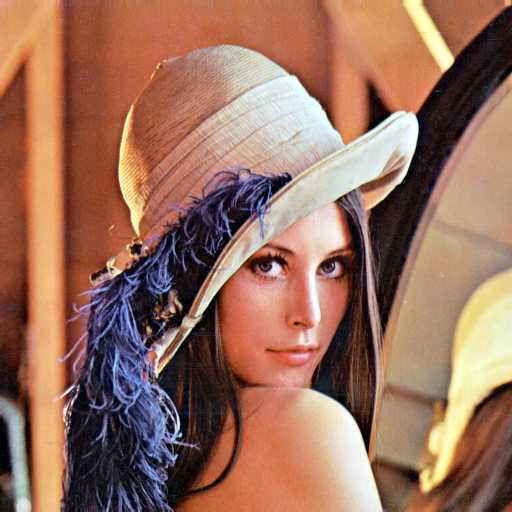

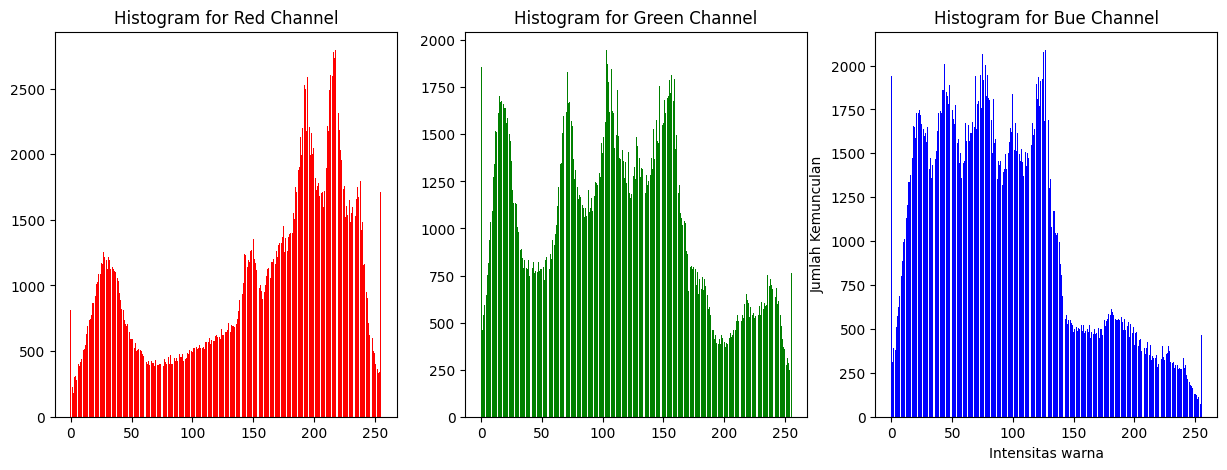

In [86]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

cv2_imshow(image)
hist_b,bins = np.histogram(image[:,:,0].flatten(),256,[0,256])
hist_g,bins = np.histogram(image[:,:,1].flatten(),256,[0,256])
hist_r,bins = np.histogram(image[:,:,2].flatten(),256,[0,256])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.bar(bins[:-1],hist_r, color='r'), plt.title('Histogram for Red Channel')
plt.subplot(1,3,2), plt.bar(bins[:-1],hist_g, color='g'), plt.title('Histogram for Green Channel')
plt.subplot(1,3,3), plt.bar(bins[:-1],hist_b, color='b'), plt.title('Histogram for Bue Channel')

plt.xlabel('Intensitas warna')
plt.ylabel('Jumlah Kemunculan')
plt.show()

# 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

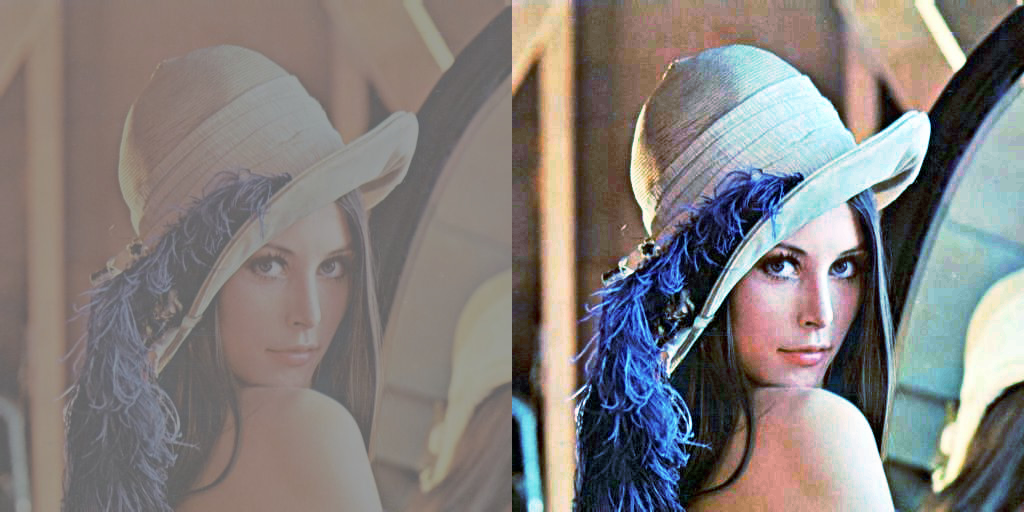

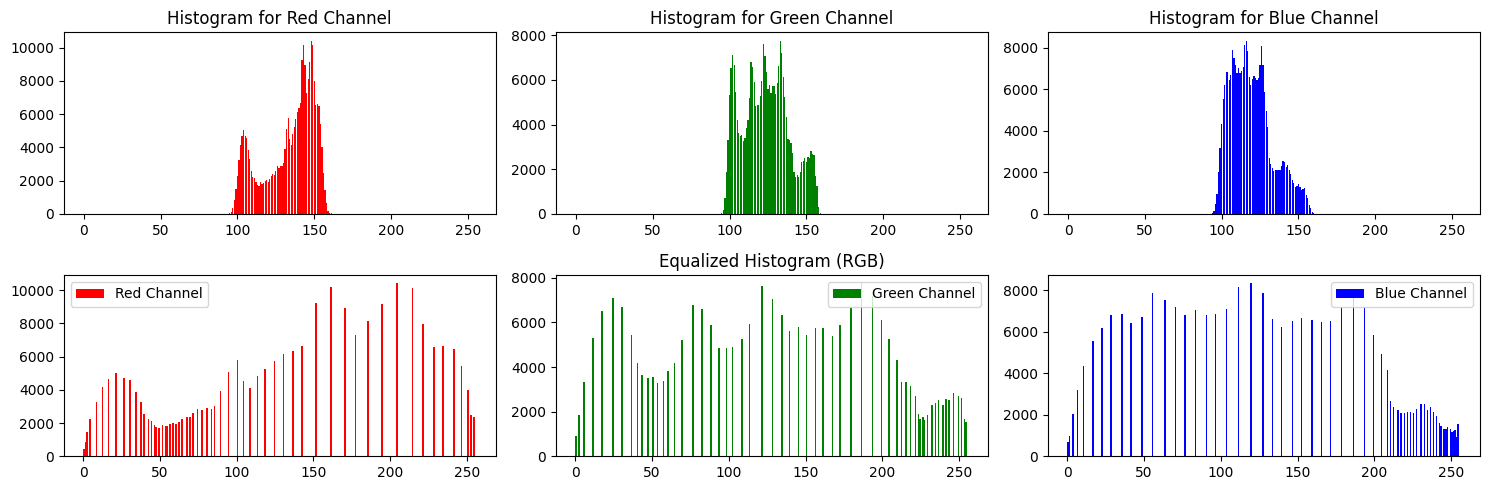

In [87]:
# Input image
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

hist_b, bins = np.histogram(image[:,:,0], 256, [0, 256])
hist_g, bins = np.histogram(image[:,:,1], 256, [0, 256])
hist_r, bins = np.histogram(image[:,:,2], 256, [0, 256])

jml_r = hist_r.cumsum()
jml_g = hist_g.cumsum()
jml_b = hist_b.cumsum()
jml_normalized_r = (jml_r - jml_r.min()) * 255 / (jml_r.max() - jml_r.min())
jml_normalized_g = (jml_g - jml_g.min()) * 255 / (jml_g.max() - jml_g.min())
jml_normalized_b = (jml_b - jml_b.min()) * 255 / (jml_b.max() - jml_b.min())


b_channel = np.interp(image[:, :, 0].flatten(), range(256), jml_normalized_b).reshape(image[:, :, 0].shape)
g_channel = np.interp(image[:, :, 1].flatten(), range(256), jml_normalized_g).reshape(image[:, :, 1].shape)
r_channel = np.interp(image[:, :, 2].flatten(), range(256), jml_normalized_r).reshape(image[:, :, 2].shape)

# Menggabungkan kembali kanal R, G, B
equalized_image = cv.merge([b_channel.astype('uint8'), g_channel.astype('uint8'), r_channel.astype('uint8')])

result_image = cv.hconcat([image, equalized_image])
cv2_imshow(result_image)

plt.figure(figsize=(15,5))
# Baris 1: Plot histogram
plt.subplot(2, 3, 1), plt.bar(bins[:-1], hist_r, color='r'), plt.title('Histogram for Red Channel')
plt.subplot(2, 3, 2), plt.bar(bins[:-1], hist_g, color='g'), plt.title('Histogram for Green Channel')
plt.subplot(2, 3, 3), plt.bar(bins[:-1], hist_b, color='b'), plt.title('Histogram for Blue Channel')

# Baris 2: Plot histogram kumulatif yang dinormalisasi
plt.subplot(2, 3, 4)
plt.hist(r_channel.flatten(), 256, [0, 256], color='r', label='Red Channel')
plt.legend()
plt.subplot(2, 3, 5)
plt.title('Equalized Histogram (RGB)')
plt.hist(g_channel.flatten(), 256, [0, 256], color='g', label='Green Channel')
plt.legend()
plt.subplot(2, 3, 6)
plt.hist(b_channel.flatten(), 256, [0, 256], color='b', label='Blue Channel')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?


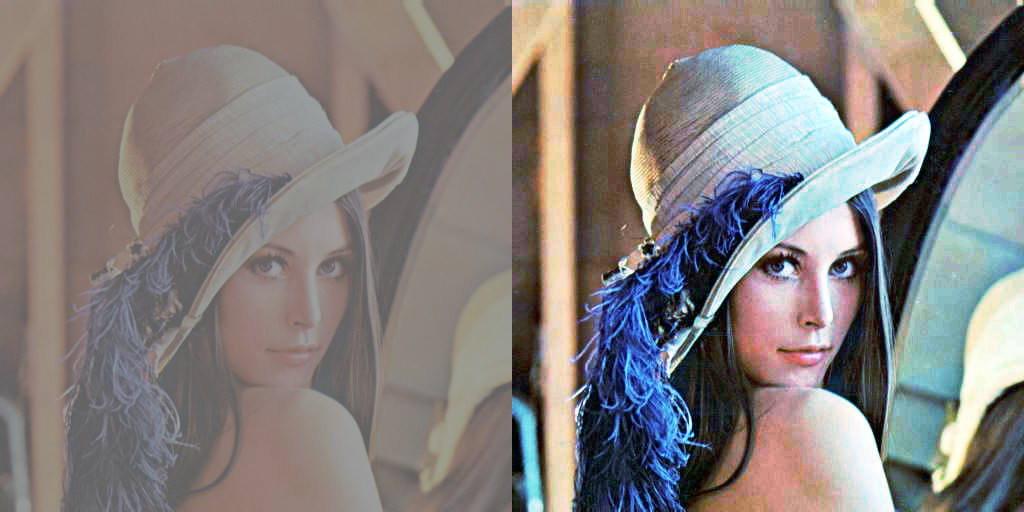

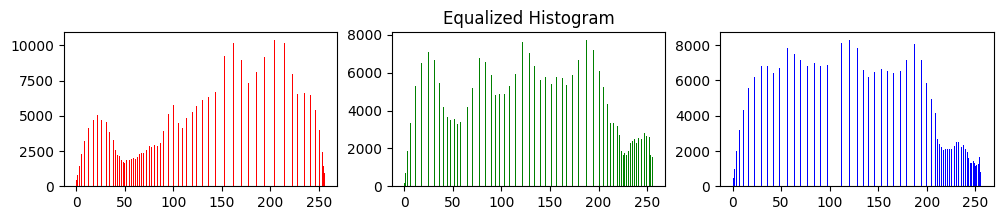

In [88]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Pisahkan channel
b, g, r = cv.split(img)

# Equalize setiap channel
b_equ = cv.equalizeHist(b)
g_equ = cv.equalizeHist(g)
r_equ = cv.equalizeHist(r)

# Menggabungkan setiap channel
equ = cv.merge((b_equ, g_equ, r_equ))

# Menggabungkan gambar asli dan hasil
res = cv.hconcat((img, equ))
cv2_imshow(res)

# Menampilkan grafik
plt.figure(figsize=(12, 2))

plt.subplot(1, 3, 1)
plt.hist(r_equ.flatten(), 256, [0, 256],color = 'r')

plt.subplot(1, 3, 2)
plt.hist(g_equ.flatten(), 256, [0, 256],color = 'g')
plt.title("Equalized Histogram")

plt.subplot(1, 3, 3)
plt.hist(b_equ.flatten(), 256, [0, 256],color = 'b')

plt.show()

# 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih (Gunakan gambar lena.jpg)


In [89]:
colors = {
    'black': (0, 0, 0),
    'green': (0, 255, 0),
    'yellow': (255, 255, 0),
    'blue': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'white': (255, 255, 255)
}

In [90]:
def map_color(pixel):
    min_dist = float('inf')
    best_color = None
    for color_name, color_value in colors.items():
        dist = np.sqrt(np.sum((np.array(pixel) - np.array(color_value))**2))
        if dist < min_dist:
            min_dist = dist
            best_color = color_value
    return best_color

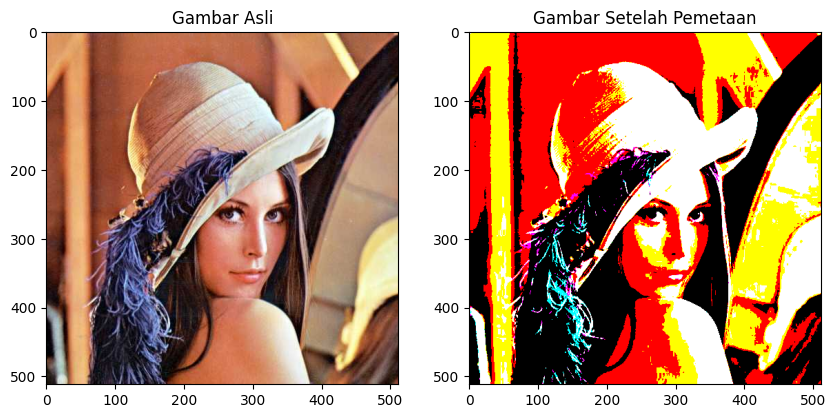

In [91]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

mapped_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_img[i, j] = map_color(img[i, j])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(mapped_img,cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Pemetaan')
plt.show()

# 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)


In [92]:
def threshold(color_value):
  if color_value > 255:
    return 255
  elif color_value < 0:
    return 0
  else:
    return color_value

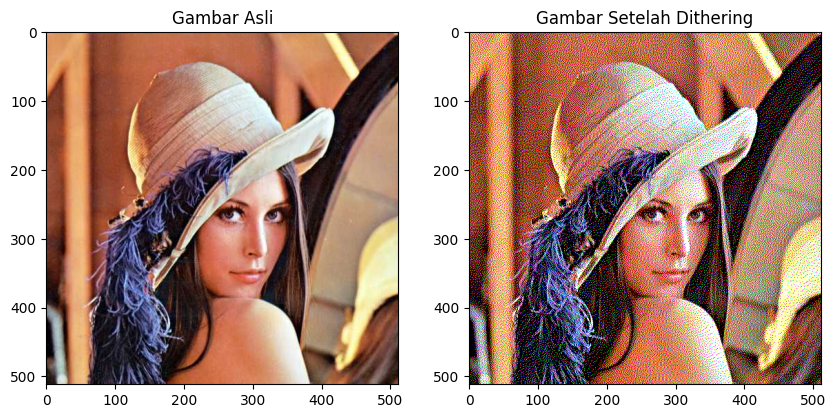

In [93]:
def floyd_steinberg_dithering(image):
    # Dapatkan dimensi gambar
    height, width = image.shape[:2]

    # Ubah citra ke float untuk menghitung kesalahan secara akurat
    image = image.astype(np.float32)

    # Looping setiap piksel gambar
    for y in range(height):
        for x in range(width):
            # Simpan nilai RGB lama
            old_pixel = image[y, x].copy()
            jarakPixel = 1

            # Lakukan thresholding ke 0 atau 255 (hitam atau putih)
            new_pixel = np.round(old_pixel * jarakPixel/ 255.0) * (255.0 * jarakPixel)
            image[y, x] = new_pixel

            # Hitung kuantitasi error
            error = old_pixel - new_pixel

            # Distribusi error ke tetangga sesuai Floyd-Steinberg (R1-R4)
            if x + 1 < width:  # R1 (kanan)
                image[y, x + 1] = image[y, x + 1] + error * 7 / 16
                image[y, x + 1] = np.array([threshold(val) for val in image[y, x + 1]])
            if x - 1 >= 0 and y + 1 < height:  # R2 (bawah kiri)
                image[y + 1, x - 1] = image[y + 1, x - 1] + error * 3 / 16
                image[y + 1, x - 1] = np.array([threshold(val) for val in image[y + 1, x - 1]])
            if y + 1 < height:  # R3 (bawah)
                image[y + 1, x] = image[y + 1, x] + error * 5 / 16
                image[y + 1, x] = np.array([threshold(val) for val in image[y + 1, x]])
            if x + 1 < width and y + 1 < height:  # R4 (bawah kanan)
                image[y + 1, x + 1] = image[y + 1, x + 1] + error * 1 / 16
                image[y + 1, x + 1] = np.array([threshold(val) for val in image[y + 1, x + 1]])

    # Pastikan hasil dithering masih dalam rentang [0, 255]
    image = np.clip(image, 0, 255).astype(np.uint8)
    return image

# Input gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image1 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Lakukan proses dithering
dithered_image = floyd_steinberg_dithering(image)

# Tampilkan hasil sebelum dan sesudah dithering
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Dithering')

plt.show()


# 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

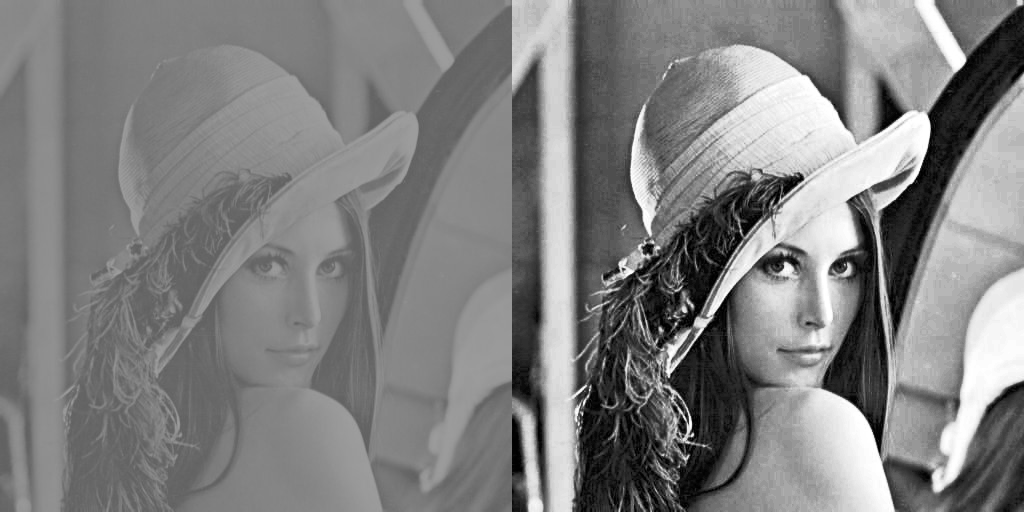

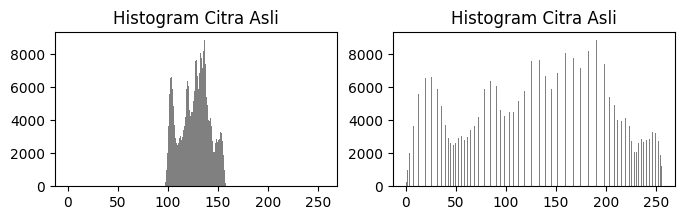

In [94]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Equalize histogram
equ = cv.equalizeHist(gray_img)

res = np.hstack((gray_img, equ))  #stacking images side-by-side
cv2_imshow(res)

plt.figure(figsize=(8, 2))

plt.subplot(1,2,1)
plt.hist(gray_img.flatten(), 256, [0, 256],color='grey')
plt.title('Histogram Citra Asli')
plt.subplot(1,2,2)
plt.hist(equ.flatten(), 256, [0, 256],color='grey')
plt.title('Histogram Citra Asli')

plt.show()

In [95]:
def threshold(color_value):
  if color_value > 255:
    return 255
  elif color_value < 0:
    return 0
  else:
    return color_value

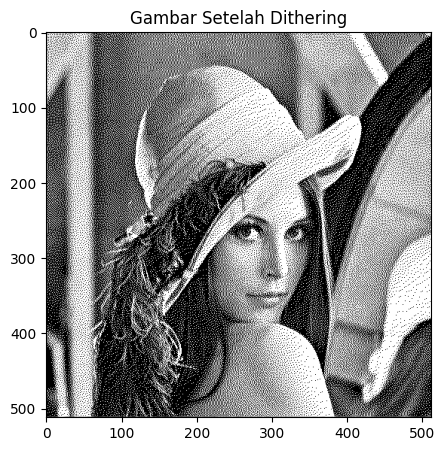

In [96]:
def floyd_steinberg_dithering(equ):
    # Dapatkan dimensi gambar
    height, width = equ.shape

    # Looping setiap piksel gambar
    for y in range(height-1):
        for x in range(width-1):
            # Simpan nilai RGB lama
            old_pixel = equ[y, x]
            jarakPixel = 3

            # Lakukan thresholding ke 0 atau 255 (hitam atau putih)
            new_pixel = np.round(old_pixel/ 255.0) * 255
            equ[y, x] = new_pixel

            # Hitung kuantitasi error
            error = old_pixel - new_pixel

            # Distribusi error ke tetangga sesuai Floyd-Steinberg (R1-R4)
            if x + 1 < width:  # R1
                equ[y, x+1] = threshold(equ[y, x+1] + error * 7/16)
            if y + 1 < height and x - 1 >= 0:  # R2
                equ[y+1, x-1] = threshold(equ[y+1, x-1] + error * 3/16)
            if y + 1 < height:  # R3
                equ[y+1, x] = threshold(equ[y+1, x] + error * 5/16)
            if y + 1 < height and x + 1 < width:  # R4
                equ[y+1, x+1] = threshold(equ[y+1, x+1] + error * 1/16)

    # Pastikan hasil dithering masih dalam rentang [0, 255]
    equ1 = np.clip(equ, 0, 255).astype(np.uint8)

    return equ1

# Lakukan proses dithering
dithered_image = floyd_steinberg_dithering(equ)

# Tampilkan hasil sebelum dan sesudah dithering
plt.figure(figsize=(10, 5))

plt.imshow(dithered_image, cmap='gray')
plt.title('Gambar Setelah Dithering')
plt.show()


In [108]:
# !jupyter nbconvert Week6.ipynb --to pdf
!jupyter nbconvert --to pdf /content/Week6.ipynb

[NbConvertApp] Converting notebook /content/Week6.ipynb to pdf
[NbConvertApp] Support files will be in Week6_files/
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Making directory ./Week6_files
[NbConvertApp] Writing 65945 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '